In [110]:
from numpy import*
# 导入文件数据
def loadDataSet(file_name):
    # dataMat为原始数据， labelMat为原始数据的标签
    dataMat = []     #原始数据的特征
    labelMat = []     #原始数据的标签
    fr = open(file_name)   #打开要解析的文件路径
    for line in fr.readlines():
        lineArr = line.strip().split()
        # 为了方便计算，我们将 X0 的值设为 1.0 ，也就是在每一行的开头添加一个 1.0 作为 X0
        dataMat.append([1.0, float(lineArr[0]), float(lineArr[1])])#为了方便后续的计算我们一般令x0为1
        labelMat.append(int(lineArr[2]))
    return dataMat, labelMat #返回加载好的原始数据特征，和原始数据标签

In [111]:
# sigmoid阶跃函数
def sigmoid(inX):
    return 1.0 / (1 + exp(-inX))


In [112]:
def gradAscent(dataMatIn,classLabels):
    dataMatrix=mat(dataMatIn)  #转换为numpy矩阵
    labelMat=mat(classLabels).transpose()   #transpose（）将行向量转换为列向量，转置
    m,n=shape(dataMatrix)   #m是行数（样本数），n是列数（特征数）
    alpha=0.001    #学习率，本书也把他叫做步长
    maxCycles=500   #最大的迭代次数
    weights=ones((n,1))   #生成一个初始全为1的w权重，长度自然等于特征的个数
    for k in range(maxCycles):
        h=sigmoid(dataMatrix*weights)   #这里计算出的h的每一行就是每一个样本通过sigmoid算出的输出值
        error=(labelMat-h)     #error的每一行代表每一个样本输出值和真实值的误差
        weights=weights+alpha*dataMatrix.transpose()*error   #这是一个递归公式经过一系列推到之后得出的公式
    return weights



In [113]:
dataarr,labelmat=loadDataSet('testSet.txt')
gradAscent(dataarr,labelmat)
import matplotlib.pyplot as plt

In [114]:
#数据展示
def plotBestFit(weights):
    '''
    dataArr:样本数据的特征
    labelMat:样本数据的类别标签，即目标变量
    weights:回归系数
    '''
    dataMat,labelMat=loadDataSet('testSet.txt')
    dataArr=array(dataMat)
    n = shape(dataArr)[0]   #获取特征集上的行数，即样本数
    xcord1 = []; ycord1 = []   
    xcord2 = []; ycord2 = []
    for i in range(n):      #根据不同类别把样本分离
        if int(labelMat[i])== 1:
            xcord1.append(dataArr[i,1]); ycord1.append(dataArr[i,2])
        else:
            xcord2.append(dataArr[i,1]); ycord2.append(dataArr[i,2])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xcord1, ycord1, s=30, c='red', marker='s')
    ax.scatter(xcord2, ycord2, s=30, c='green')
    x = arange(-3.0, 3.0, 0.1)
    # w0+w1*x+w2*y=0 => y = (-w0-w1*x)/w2   
    y = (-weights[0]-weights[1]*x)/weights[2]
    ax.plot(x, y)
    plt.xlabel('X'); plt.ylabel('Y')
    plt.show()




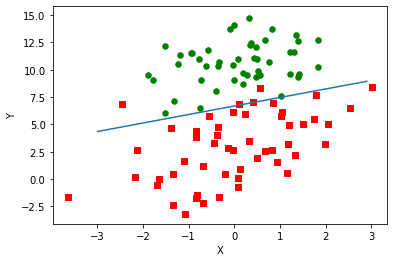

[[ 4.12414349]
 [ 0.48007329]
 [-0.6168482 ]]


In [117]:

wei=(gradAscent(dataarr,labelmat))

plotBestFit( wei.getA())
print(wei)